# Project Demo

-----
## Setup

In [73]:
import os
import numpy as np
from IPython.display import display
import urllib
from PIL import Image
import json
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from random import randint

In [49]:
ETH_API = 'https://api.coinbase.com/v2/exchange-rates?currency=ETH'

ETH_SYM = 'Ξ'
USD_SYM = '$'
BTC_SYM = '₿'

with urllib.request.urlopen(ETH_API) as data:
    C_EXCHANGE = json.load(data)['data']['rates']

def exchange(amt: float, frm: str, to: str = None):
    if to is None:
        return amt * float(C_EXCHANGE[frm])
    else:
        return amt / float(C_EXCHANGE[frm]) * float(C_EXCHANGE[to])

def dollars(val: float):
    return f'{USD_SYM} {val:,.2f}'

def eths(val: float):
    return f'{val:,.4f} {ETH_SYM}'

def coins(val: float):
    return f'{val:,.4f} {BTC_SYM}'

print(f"current rate ({ETH_SYM}->{USD_SYM}) {dollars(exchange(1.0, 'USD'))}")
print(f"current rate ({USD_SYM}->{ETH_SYM}) {eths(exchange(1.0, 'USD', 'ETH'))}")

print(f"current rate ({ETH_SYM}->{BTC_SYM}) {coins(exchange(1.0, 'BTC'))}")
print(f"current rate ({BTC_SYM}->{ETH_SYM}) {eths(exchange(1.0, 'BTC', 'ETH'))}")

current rate (Ξ->$) $ 2,850.85
current rate ($->Ξ) 0.0004 Ξ
current rate (Ξ->₿) 0.0741 ₿
current rate (₿->Ξ) 13.4889 Ξ


-------
## Downloading Databases

In [1]:
!wget https://cdn.discordapp.com/attachments/945408327465181284/968611108002857010/Nft_dataset_2.zip

--2022-04-27 05:24:43--  https://cdn.discordapp.com/attachments/945408327465181284/968611108002857010/Nft_dataset_2.zip
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.134.233, 162.159.135.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.134.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8013853 (7.6M) [application/zip]
Saving to: ‘Nft_dataset_2.zip’

Nft_dataset_2.zip   100%[===================>]   7.64M  --.-KB/s    in 0.1s    

2022-04-27 05:24:43 (66.5 MB/s) - ‘Nft_dataset_2.zip’ saved [8013853/8013853]



In [2]:
!unzip Nft_dataset_2.zip

Archive:  Nft_dataset_2.zip
  inflating: Nft dataset/.949.jpg    
  inflating: Nft dataset/0.2313.png  
  inflating: Nft dataset/0.2346.png  
  inflating: Nft dataset/0.25.png    
  inflating: Nft dataset/0.2777.png  
  inflating: Nft dataset/0.2821.png  
  inflating: Nft dataset/0.2987.png  
  inflating: Nft dataset/0.3.png     
  inflating: Nft dataset/0.3014.png  
  inflating: Nft dataset/0.3149.png  
  inflating: Nft dataset/0.33.png    
  inflating: Nft dataset/0.76.png    
  inflating: Nft dataset/0.777.png   
  inflating: Nft dataset/0.8.png     
  inflating: Nft dataset/0.824.png   
  inflating: Nft dataset/0.84.png    
  inflating: Nft dataset/0.879.png   
  inflating: Nft dataset/0.889.png   
  inflating: Nft dataset/0.9.png     
  inflating: Nft dataset/0.929.png   
  inflating: Nft dataset/0.95.jpg    
  inflating: Nft dataset/0.95.png    
  inflating: Nft dataset/1.02.png    
  inflating: Nft dataset/1.035.png   
  inflating: Nft dataset/1.148.png   
  inflating: Nft datas

## Extracting DB Info

In [54]:
acceptable = ('.jpg','.jpeg','.bmp','.png')

preferred_size = (128, 128)

X = []
Y1 = []
Y2 = []

for root, dirs, files in os.walk("./Nft dataset"):
    for name in filter(lambda x: x.endswith(acceptable), files):
        full_path = os.path.join(root, name)
        print(f'found {repr(full_path)}')
        temp = Image.open(full_path)
        print(f'\timage dimensions: {temp.size}')
        if temp.size != preferred_size:
            print(f'\tresizing...')
            temp = temp.resize(preferred_size, Image.LANCZOS)
            print(f'\tnew image dimensions: {temp.size}')
        temp = temp.convert("RGB") 
        arr = np.array(temp)
        print(f'\tarray shape: {arr.shape}')
        X.append(arr)
        val = float(name.rsplit('.', 1)[0].rsplit(' ', 1)[0])
        print(f'\tvalue: {eths(val)}')
        Y1.append(val)
        Y2.append(0.0)
        print()

X = np.array(X)
Y1 = np.array(Y1)
Y2 = np.array(Y2)
        
print(X.shape)
print(Y1.shape)
print(Y2.shape)

found './Nft dataset/1.169.png'
	image dimensions: (286, 286)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 1.1690 Ξ

found './Nft dataset/0.2987.png'
	image dimensions: (286, 286)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 0.2987 Ξ

found './Nft dataset/7.02.png'
	image dimensions: (600, 600)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 7.0200 Ξ

found './Nft dataset/12.25.png'
	image dimensions: (286, 286)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 12.2500 Ξ

found './Nft dataset/2.498.png'
	image dimensions: (286, 286)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 2.4980 Ξ

found './Nft dataset/10.5.png'
	image dimensions: (286, 286)
	resizing...
	new image dimensions: (128, 128)
	array shape: (128, 128, 3)
	value: 10.5000 Ξ

found './Nft dataset/6.5.png'
	image dimensions: (286, 286)
	resizing

-----
## Creating the Model

To skip to testing and loading the model, click [here](#Testing-the-Model)

### Helpers

In [55]:
class ModelInfo:
    def __init__(self, weights, epochs=None):
        self.weights = weights
        self.epochs = epochs

    def load_model(self, model):
        model.set_weights(self.weights)
        
    def store_model(self, model, epochs=None):
        self.epochs = epochs if epochs is not None else self.epochs
        self.weights = model.get_weights()

class ModelHistory:
    def __init__(self):
        self.history = []
    
    def __iter__(self):
        return iter(self.history)
    
    def stash_model(self, model, epochs=None):
        self.history.append(ModelInfo(model.get_weights(), epochs))
        
def extend_history(old=None, new=None):
    if old is None:
        return new
    else:
        oh, nh = old.history, new.history
        for key in nh:
            if key in oh:
                oh[key].extend(nh[key])
            else:
                oh[key] = list(nh[key])
        return old

Model: "NFTValuator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputLayer (InputLayer)         [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
firstConvolution (Conv2D)       (None, 121, 121, 128 24704       inputLayer[0][0]                 
__________________________________________________________________________________________________
secondConvolution (Conv2D)      (None, 116, 116, 64) 294976      firstConvolution[0][0]           
__________________________________________________________________________________________________
thirdConvolution (Conv2D)       (None, 113, 113, 32) 32800       secondConvolution[0][0]          
________________________________________________________________________________________

INFO:tensorflow:Assets written to: NFTValuator/assets


INFO:tensorflow:Assets written to: NFTValuator/assets
/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


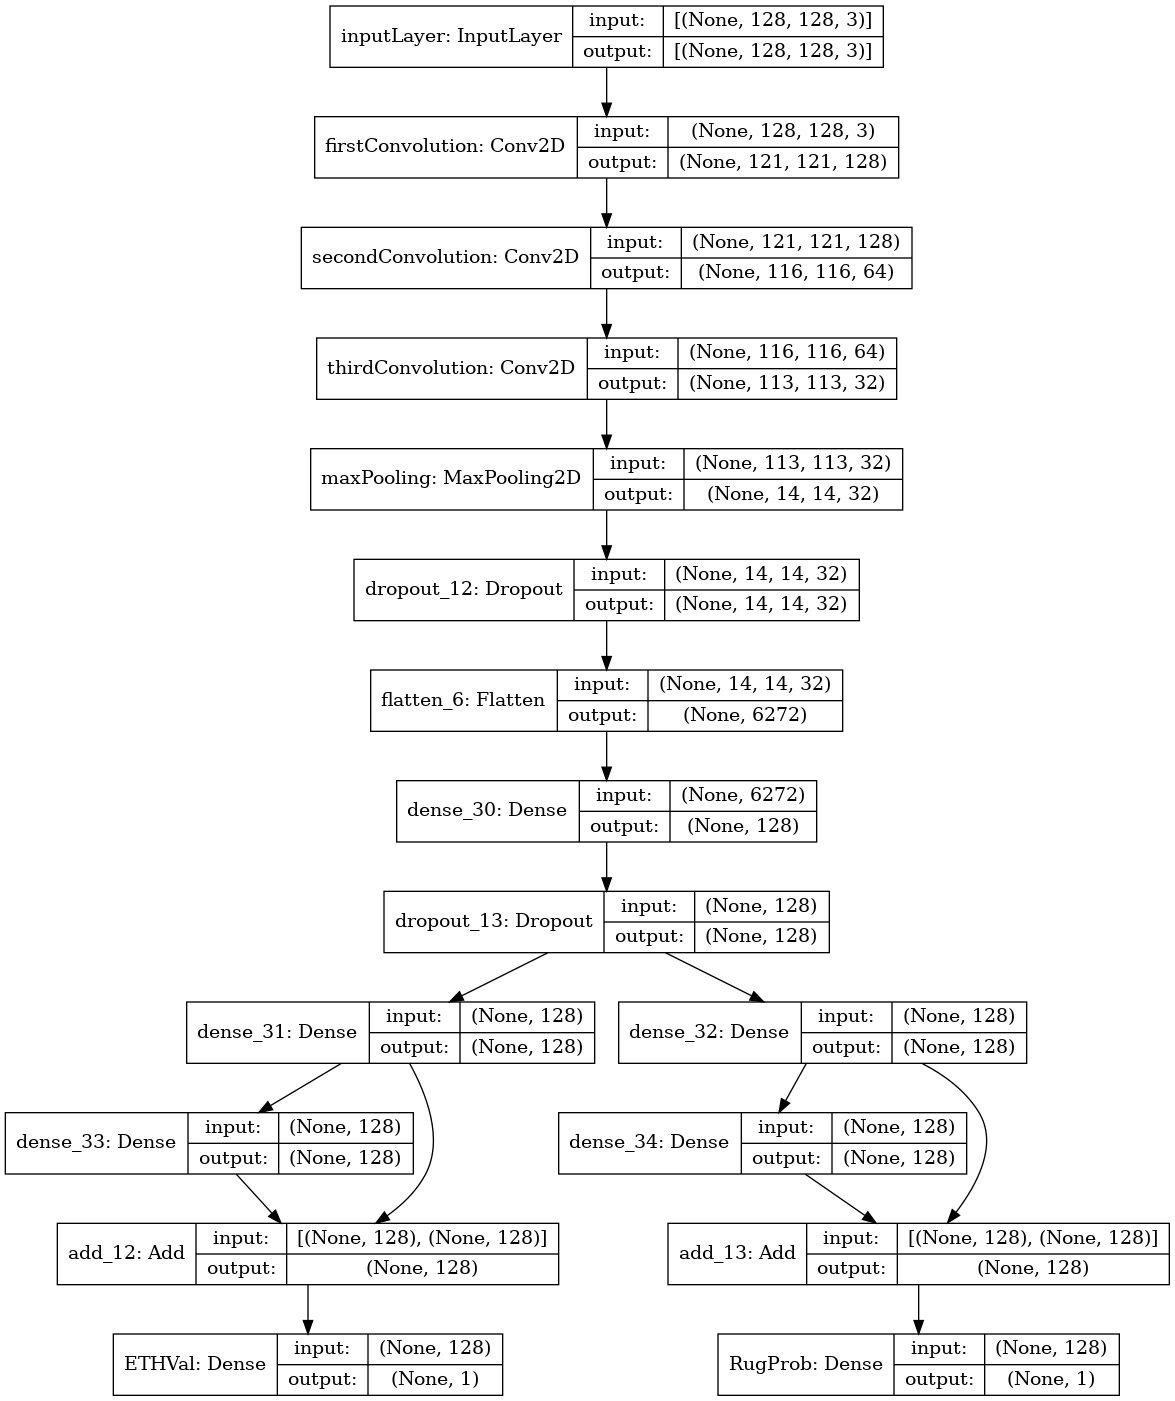

In [85]:
x = keras.layers.Input(X.shape[1:], name="inputLayer")
y = x
y = keras.layers.Conv2D(128, kernel_size=(8,8), activation='relu', name="firstConvolution")(y)
y = keras.layers.Conv2D(64, kernel_size=(6,6), activation='relu', name="secondConvolution")(y)
y = keras.layers.Conv2D(32, kernel_size=(4,4), activation='relu', name="thirdConvolution")(y)
y = keras.layers.MaxPooling2D(pool_size=(8,8), name="maxPooling")(y)
y = keras.layers.Dropout(0.05)(y)
y = keras.layers.Flatten()(y)
y = keras.layers.Dense(128, activation='relu')(y)
y = keras.layers.Dropout(0.125)(y)
z = keras.layers.Dense(128, activation='relu')(y)
y = keras.layers.Dense(128, activation='relu')(y)

stack = 1
for _ in range(stack):
    a = keras.layers.Dense(128, activation='relu')(z)
    b = keras.layers.Dense(128, activation='relu')(y)
    c = keras.layers.Add()([a, z])
    d = keras.layers.Add()([b, y])
    z, y = c, d
# y = keras.layers.LayerNormalization()(y)
# Output Logits (10)
a = keras.layers.Dense(1, activation='relu', name="ETHVal")(z) # Ethereum value of the NFT
y = keras.layers.Dense(1, activation='sigmoid', name="RugProb")(y) # Whether or not the NFT will "rug" (scam its buyers)
z = a
model = keras.Model(x,[z, y],name="NFTValuator")
generator = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.05,
    height_shift_range=0.05,
    rotation_range=5,
    zoom_range=0.1,
    horizontal_flip=True
)
model.compile(
    loss={'ETHVal': keras.losses.MeanSquaredError(), 'RugProb': keras.losses.BinaryCrossentropy()},
    optimizer=keras.optimizers.Adam(),
    metrics={'ETHVal': keras.metrics.MeanSquaredError(), 'RugProb': keras.metrics.BinaryAccuracy()}
)
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [86]:
model.save('NFTValuator')

INFO:tensorflow:Assets written to: NFTValuator/assets


INFO:tensorflow:Assets written to: NFTValuator/assets
/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


-----
## Training the Model

In [90]:
history = None
model_history = ModelHistory()

In [91]:
model = keras.models.load_model('NFTValuator')

In [92]:
batch_size = 50
epochs = 10
trials = 10

hr_w = 80
hr = '-' * hr_w

for t in range(trials):
    print(hr)
    print(f'TRIAL {t+1:,}'.center(hr_w))
    print(hr)
    history = extend_history(
        history, 
        model.fit(
            X, [Y1, Y2],
            batch_size=batch_size,
            epochs=epochs,
            verbose=1
        )
    )
    model_history.stash_model(model, epochs)

--------------------------------------------------------------------------------
                                    TRIAL 1                                     
--------------------------------------------------------------------------------
Epoch 1/10
3/3 [==============================] - 31s 8s/step - loss: 787.4502 - ETHVal_loss: 785.5428 - RugProb_loss: 1.9075 - ETHVal_mean_squared_error: 785.5428 - RugProb_binary_accuracy: 0.9273
Epoch 2/10
3/3 [==============================] - 29s 8s/step - loss: 236.1298 - ETHVal_loss: 236.1298 - RugProb_loss: 0.0000e+00 - ETHVal_mean_squared_error: 236.1298 - RugProb_binary_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 27s 7s/step - loss: 236.1298 - ETHVal_loss: 236.1298 - RugProb_loss: 0.0000e+00 - ETHVal_mean_squared_error: 236.1298 - RugProb_binary_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 28s 7s/step - loss: 236.1298 - ETHVal_loss: 236.1298 - RugProb_loss: 0.0000e+00 - ETHVal_mean_squared_err

KeyboardInterrupt: 

In [ ]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['ETHVal_mean_squared_error'])
plt.plot(history.history['RugProb_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ETH Value','Rug Probability'],loc='lower right')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['ETHVal_loss'])
plt.plot(history.history['RugProb_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ETH Value','Rug Probability'],loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
model.save('NFTValuator')

----
## Testing the Model

### Individual Testing

In [97]:
model = keras.models.load_model('NFTValuator')

	IMG #53


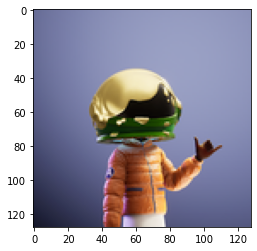

	REAL
		Price:                   2.6500 Ξ (0.1965 ₿, $ 7,554.75)
		Probability:             0.0000 %
	PRED
		Price:                  15.9335 Ξ (1.1812 ₿, $ 45,424.08)
		Probability:             0.0000 %

	IMG #19


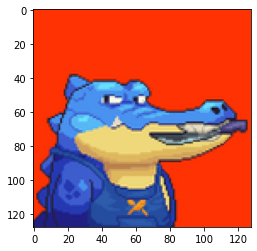

	REAL
		Price:                   0.7600 Ξ (0.0563 ₿, $ 2,166.65)
		Probability:             0.0000 %
	PRED
		Price:                  53.4010 Ξ (3.9589 ₿, $ 152,238.33)
		Probability:             0.0000 %

	IMG #87


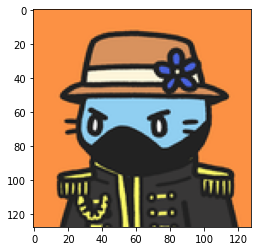

	REAL
		Price:                  13.8400 Ξ (1.0260 ₿, $ 39,455.76)
		Probability:             0.0000 %
	PRED
		Price:                  46.6464 Ξ (3.4581 ₿, $ 132,981.99)
		Probability:             0.0000 %



In [100]:
tests = 3

samples = np.random.choice(len(X), size=tests, replace=False)
for ri in samples:
        ri = randint(0, len(X)-1)
        print(f'\tIMG #{ri+1:,}')
        plt.imshow(X[ri])
        plt.show()
        print(f'\tREAL')
        print(f'\t\tPrice:{Y1[ri]:>25,.4f} Ξ ({coins(exchange(Y1[ri], "BTC"))}, {dollars(exchange(Y1[ri], "USD"))})')
        print(f'\t\tProbability:{Y2[ri]*100.0:>19,.4f} %')
        results = np.array(model.predict(X[ri:ri+1], verbose=0)).flatten()
        print(f'\tPRED')
        print(f'\t\tPrice:{results[0]:>25,.4f} Ξ ({coins(exchange(results[0], "BTC"))}, {dollars(exchange(results[0], "USD"))})')
        print(f'\t\tProbability:{results[1]*100.0:>19,.4f} %')
        print()

### Multi-test*
***This only works if you trained the model**

In [98]:
tests = 3

samples = np.random.choice(len(X), size=tests, replace=False)
ep = 0
for i, stage in enumerate(model_history):
    stage.load_model(model)
    ep += stage.epochs
    print(hr)
    print(f'TEST {i+1:,} ({ep:,} EPOCHS)'.center(hr_w))
    print(hr)
    for ri in samples:
        ri = randint(0, len(X)-1)
        print(f'\tIMG #{ri+1:,}')
        plt.imshow(X[ri])
        plt.show()
        print(f'\tREAL')
        print(f'\t\tPrice:{Y1[ri]:>25,.4f} Ξ ({coins(exchange(Y1[ri], "BTC"))}, {dollars(exchange(Y1[ri], "USD"))})')
        print(f'\t\tProbability:{Y2[ri]*100.0:>19,.4f} %')
        results = np.array(model.predict(X[ri:ri+1], verbose=0)).flatten()
        print(f'\tPRED')
        print(f'\t\tPrice:{results[0]:>25,.4f} Ξ ({coins(exchange(results[0], "BTC"))}, {dollars(exchange(results[0], "USD"))})')
        print(f'\t\tProbability:{results[1]*100.0:>19,.4f} %')
        print()